In [844]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pprint
import plotly.express as px


In [845]:
import numpy as np
import pandas as pd

In [846]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [847]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [848]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///C:\\Users\\user\\Documents\\ITESM_DA\\sqlalchemy-challenge\\data\\hawaii.sqlite")


In [849]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [850]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [851]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [852]:
# We can view all of the classes that automap found


In [853]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [854]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [855]:
# Using the inspector to print the column names 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [856]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [857]:
# Using the inspector to print the column names 
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [858]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [859]:
# Calculate the date 1 year ago from the last data point in the database
from datetime import datetime

result_date = session.query(func.max(Measurement.date)) 
result_date=pd.DataFrame(result_date , columns=['date']) 
f_date_l=result_date.values.tolist()
f_date_l[0]
v_date = ''.join(map(str, f_date_l[0]))
query_date = datetime.strptime(v_date,'%Y-%m-%d').date()
query_date = query_date - dt.timedelta(days=364)
query_date
  

datetime.date(2016, 8, 24)

In [862]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
date = query_date
v_date = query_date 
preci_12m = session.query(Measurement.date,func.sum(Measurement.prcp)).\
                          filter(Measurement.date > date,Measurement.prcp > 0 ).\
                          group_by(Measurement.date) 

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prec = pd.DataFrame(preci_12m, columns=['date', 'prcp'])

# Sort the dataframe by date
df_prec = df_prec.sort_values(by="date")
df_prec.head()


,date,prcp
0,2016-08-25,0.54
1,2016-08-26,0.10
2,2016-08-27,0.32
3,2016-08-28,3.10
4,2016-08-29,1.46


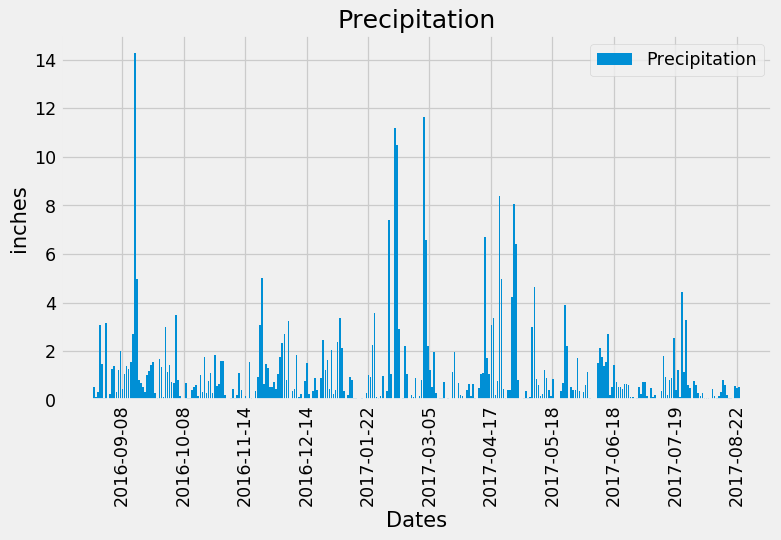

In [863]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt
import numpy as np
x=df_prec['date']
y=df_prec['prcp']
fig = plt.figure(figsize=(20, 5), dpi=90)
ax = fig.add_subplot(121)
ax.bar(x,y, label='Precipitation')
start, end =ax.get_xlim()
plt.xticks(np.arange(start, end, step=30))
plt.xticks(rotation=90)

plt.title('Precipitation')
plt.legend()
plt.ylabel('inches')
plt.xlabel('Dates')
plt.show()

In [864]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prec.describe()

,prcp
count,316.000000
mean,1.095696
std,1.807114
min,0.010000
25%,0.130000
50%,0.515000
75%,1.230000
max,14.280000


In [866]:
# Design a query to show how many stations are available in this dataset?
station_list = session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation)
for i in station_list:
    print(i)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [867]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
join_dat =session.query(Measurement.station, func.count(Station.station) ).\
                   filter(Measurement.station==Station.station).\
                   group_by(Measurement.station).\
                   order_by(func.count(Station.station).desc())
for i in join_dat:
    print(i)
        

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [868]:
#get the most active station (base on number of incidents)
df_prec = pd.DataFrame(join_dat, columns=['station','func.count(Station.station)'])
df_prec.rename(columns={"func.count(Station.station)": "s_count"}, inplace=True)
df_prec= df_prec[df_prec.s_count == df_prec.s_count.max()]
d_stat=df_prec['station']
l_station=d_stat.values.tolist()
v_station=l_station[0]
v_station

'USC00519281'

In [869]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

q_station_mact = session.query(Measurement.station,Station.name,func.min(Measurement.tobs).label('min_temp'),
                               func.max(Measurement.tobs).label('max_temp'),func.avg(Measurement.tobs).label('avg_temp')).\
                   filter(Measurement.station==v_station)
df_sta_md = pd.DataFrame(q_station_mact , columns=['station', 'name','min_temp','max_temp','avg_temp'])
#for i in q_station_mact:
 #   print(i)
df_sta_md

,station,name,min_temp,max_temp,avg_temp
0,USC00519281,"WAIKIKI 717.2, HI US",54.0,85.0,71.663781


In [870]:
# Choose the station with the highest number of temperature observations.
qo_temp =session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())#.all())
for i in qo_temp: print(i)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [871]:

print(v_date,v_station)


2016-08-24 USC00519281


In [877]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qo_temp_12m = session.query(Measurement.tobs,(Measurement.tobs).label('c_temp')).\
                          filter(Measurement.date > v_date ,Measurement.tobs > 0 ).\
                         filter(Measurement.station == v_station)#.\
df_temp = pd.DataFrame(qo_temp_12m  , columns=['tobs', 'c_temp'])
df_temp = df_temp.sort_values(by="c_temp")
df_temp.head()

,tobs,c_temp
168,59.0,59.0
167,59.0,59.0
161,59.0,59.0
248,60.0,60.0
162,60.0,60.0


Text(0, 0.5, 'Temp (f)')

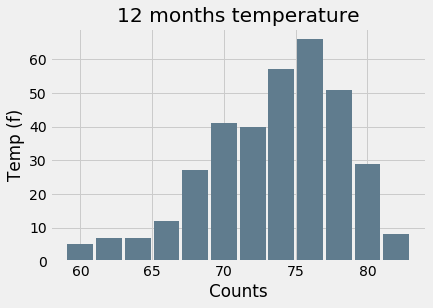

In [879]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import pandas as pd
x=df_temp['c_temp']
#y=df_prec['prcp']
# Generate data on commute times.
size, scale = 1000, 10
#commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

x.plot.hist(grid=True, bins=12, rwidth=0.9,
                   color='#607c8e')
plt.title('12 months temperature')
plt.xlabel('Counts')
plt.ylabel('Temp (f)')
#plt.grid(axis='y', alpha=0.75)

## Bonus Challenge Assignment

# Temperature Analysis I

In [880]:
from sqlalchemy import extract  
# function to get the measurement values from an specific month
def temp_by_month(v_month):
    qo_temp_month=session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date)==v_month) #.all()
    return qo_temp_month

In [881]:
#get the june data temperature    
qo_temp_month=temp_by_month(6)
df_temp_month = pd.DataFrame(qo_temp_month  , columns=['date', 'june_temp'])
vl_june =df_temp_month['june_temp']


In [882]:
#get  december  data temperature
qo_temp_month=temp_by_month(12)

df_temp_month = pd.DataFrame(qo_temp_month  , columns=['date', 'dec_temp'])
vl_dec =df_temp_month['dec_temp']
jun_series = pd.Series(vl_june )
dec_series = pd.Series(vl_dec )
dic_data={'june_temp':jun_series,'dec_temp':dec_series}
#convert series to df
df_temp_data= pd.DataFrame(dic_data)


In [883]:
df_temp_data['dec_temp'].replace('', np.nan, inplace=True)


In [884]:
# get the central measure tendency
df_temp_data[['june_temp','dec_temp']].describe()

,june_temp,dec_temp
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


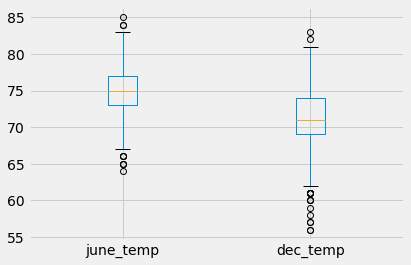

In [885]:
from scipy import stats
import matplotlib.pyplot as plt

df_temp_data[['june_temp','dec_temp']].plot(kind='box')

In [ ]:
# I got some outliers in dec_emp

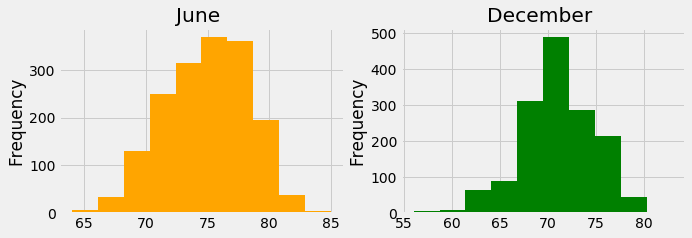

In [886]:
#df_temp_data[['june_temp','dec_temp']].plot(kind='box')
plt.figure(figsize=(10,7))
ax2 = plt.subplot(221)
ax2 = df_temp_data['june_temp'].plot(kind='hist', ax=ax2, title= 'June ',color="orange")

ax3 = plt.subplot(222) 
fig.tight_layout(pad=8.0)
ax3 = df_temp_data['dec_temp'].plot(kind='hist', ax=ax3, title= 'December ',color="green")

In [ ]:
# data is not normaly distibuted

In [887]:
stats.shapiro(df_temp_data['june_temp'])

(0.983282744884491, 3.5219510684594835e-13)

In [888]:
# t test independent test
stats.ttest_ind(df_temp_data['june_temp'].dropna(), df_temp_data['dec_temp'].dropna())

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [ ]:
#  I choosed the T-test independent becasue the count of records for both datasets(jun-dec) are not equal.

# Temperature Analysis II

In [889]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [890]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
v_ini_date ='2017-03-01'
v_ini_date = datetime.strptime(v_ini_date,'%Y-%m-%d').date()
v_beg_date =v_ini_date - dt.timedelta(days=364)

# 15 days off (vacation previos year match)
v_end_date =v_beg_date + dt.timedelta(days=15)
#print('ini date',beg_date, 'Beg date',end_date, "End date", v_end_date)
print('Vacation temperature measures:',calc_temps(v_beg_date, v_end_date))

Vacation temperature measures: [(62.0, 70.1470588235294, 78.0)]


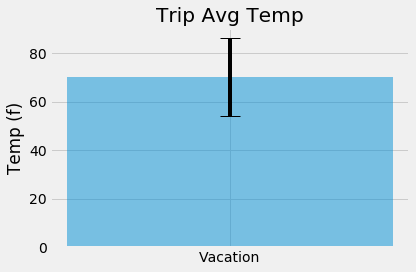

In [894]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#v_return= calc_temps('2016-03-02', '2016-03-17')

# Create lists for the plot
v_tmax_tmin= 78-62
concept = ['Vacation']
x_pos = np.arange(len(concept ))
v_avg = [70]
error = [v_tmax_tmin]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, v_avg, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temp (f)')
ax.set_xticks(x_pos)
ax.set_xticklabels(concept)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()




# Daily Rainfall Average

In [895]:
print(v_beg_date,v_end_date)

2016-03-02 2016-03-17


In [896]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


qo_station_prec = session.query(Measurement.station,Station.name,func.sum(Measurement.prcp).label('sum_prec'),Station.latitude,Station.longitude,Station.elevation).\
                               filter(Measurement.date>=v_beg_date,Measurement.date<=v_end_date).\
                               filter(Measurement.station == Station.station).\
                               group_by(Measurement.station)
df_temp = pd.DataFrame(qo_station_prec  , columns=['station','name', 'sum_prec', 'latitude','longitude','elevation'])

df_temp = df_temp.sort_values(by="sum_prec")
df_temp.head()


,station,name,sum_prec,latitude,longitude,elevation
3,USC00517948,"PEARL CITY, HI US",0.00,21.39340,-157.97510,11.9
5,USC00519397,"WAIKIKI 717.2, HI US",0.32,21.27160,-157.81680,3.0
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.32,21.33556,-157.71139,19.5
0,USC00513117,"KANEOHE 838.1, HI US",0.96,21.42340,-157.80150,14.6
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.37,21.52130,-157.83740,7.0


In [897]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [898]:
 print(v_beg_date,v_end_date)

2016-03-02 2016-03-17


In [899]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

import datetime
from datetime import date
import numpy as np

v_tot_days =v_end_date-v_beg_date
oneday = datetime.timedelta(days = 1)
vf_beg_date=v_beg_date
vl_final= []
vl_mtd_day=[]
for i in range(v_tot_days.days):
    timestampStr = vf_beg_date.strftime("%m-%d")
    v_dn= daily_normals(timestampStr)    
    print('iteration',i,"month-day",timestampStr,'Daily normals',v_dn)
    vf_beg_date =vf_beg_date+oneday
    vl_final.append(v_dn)
    vl_mtd_day.append(timestampStr)
    

iteration 0 month-day 03-02 Daily normals [(61.0, 70.36666666666666, 78.0)]
iteration 1 month-day 03-03 Daily normals [(60.0, 70.06896551724138, 78.0)]
iteration 2 month-day 03-04 Daily normals [(57.0, 69.27272727272727, 77.0)]
iteration 3 month-day 03-05 Daily normals [(60.0, 67.89090909090909, 76.0)]
iteration 4 month-day 03-06 Daily normals [(60.0, 69.20338983050847, 76.0)]
iteration 5 month-day 03-07 Daily normals [(60.0, 69.17241379310344, 78.0)]
iteration 6 month-day 03-08 Daily normals [(59.0, 68.72413793103448, 78.0)]
iteration 7 month-day 03-09 Daily normals [(57.0, 68.56140350877193, 75.0)]
iteration 8 month-day 03-10 Daily normals [(57.0, 69.12280701754386, 75.0)]
iteration 9 month-day 03-11 Daily normals [(60.0, 69.89285714285714, 82.0)]
iteration 10 month-day 03-12 Daily normals [(62.0, 69.88888888888889, 80.0)]
iteration 11 month-day 03-13 Daily normals [(56.0, 69.29629629629629, 77.0)]
iteration 12 month-day 03-14 Daily normals [(62.0, 70.32758620689656, 77.0)]
iteration

In [900]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_measures = pd.DataFrame(np.array(vl_final).reshape(15,3), columns = list("abc"))
df_mth_day = pd.DataFrame(vl_mtd_day)
df_final_m=df_mth_day.join(df_measures)
df_final_m.rename(columns={0:'Month-Day','a':'min_temp','b':'avg_temp','c':'max_temp'},inplace=True)
df_final_m

,Month-Day,min_temp,avg_temp,max_temp
0,03-02,61.0,70.366667,78.0
1,03-03,60.0,70.068966,78.0
2,03-04,57.0,69.272727,77.0
3,03-05,60.0,67.890909,76.0
4,03-06,60.0,69.203390,76.0
5,03-07,60.0,69.172414,78.0
6,03-08,59.0,68.724138,78.0
7,03-09,57.0,68.561404,75.0
8,03-10,57.0,69.122807,75.0
9,03-11,60.0,69.892857,82.0


Text(0.5, 1.0, 'Trip  Vacation Temperature')

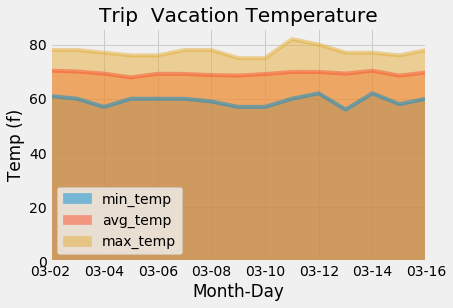

In [901]:
#Use Pandas to plot an area plot (stacked=False) for the daily normals.
df_to_plot=df_final_m.set_index(['Month-Day'])
ax = df_to_plot.plot(kind='area', stacked=False)
ax.set_ylabel('Temp (f)')
ax.set_title('Trip  Vacation Temperature')

In [ ]:
# The avg temperature  2016 around 70 (f)